# Test fitting time of MLE fitting

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import unittest
import numpy as np
import multiprocessing as mp
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

from aind_dynamic_foraging_models.generative_model.agent_q_learning import forager_Hattori2019
from aind_behavior_gym.dynamic_foraging.task.coupled_block_task import CoupledBlockTask
from aind_dynamic_foraging_basic_analysis import plot_foraging_session

#### Set up agent and generate simulated data

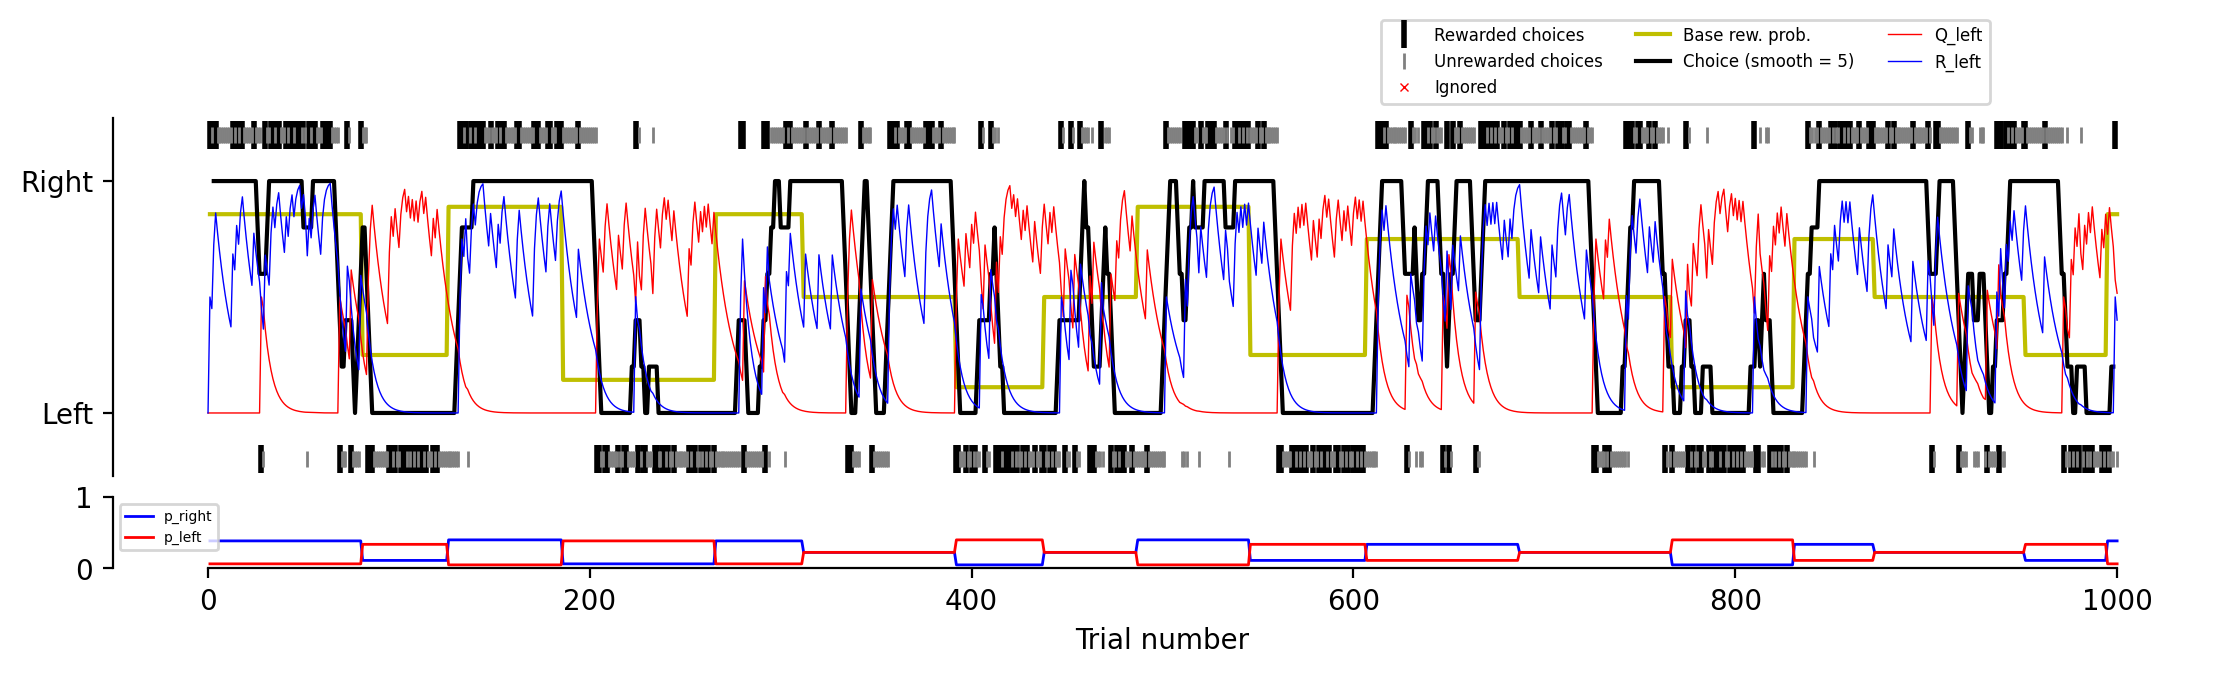

In [5]:
forager = forager_Hattori2019(
    dict(
        softmax_inverse_temperature=5,
        biasL=0,
    ),
    seed=42,
)
task = CoupledBlockTask(
    reward_baiting=True, 
    num_trials=1000, 
    seed=42
    )

forager.perform(task)
choice_history = forager.get_choice_history()
reward_history = forager.get_reward_history()
ground_truth_params = forager.params.model_dump()
ground_truth_choice_prob = forager.choice_prob
ground_truth_q_estimation = forager.q_estimation

fig, axes = forager.plot_session()


#### Model fitting

In [3]:
def time_fitting(DE_workers):
    start_time = time.time()
    forager = forager_Hattori2019()  # To fit a model, just create a new forager
    forager.fit(
        choice_history,
        reward_history,
        fit_bounds_override={"softmax_inverse_temperature": [0, 100]},
        clamp_params={"biasL": 0},
        DE_workers=DE_workers,
    )
    end_time = time.time()
    
    fitting_result = forager.fitting_result
    assert fitting_result.success
    np.testing.assert_array_almost_equal(
        fitting_result.x, [0.6010, 0.1087, 0.1544, 4.8908], decimal=2
    )
    
    fit_time = end_time - start_time
    print(f'Fitting time, DE_workers = {DE_workers}: {fit_time} s')
    return fit_time, forager

Warning: this cell takes a long time to run!

In [4]:
num_cpu_to_test = [1, 2, 4, 8, 16]
runs = 10
times = np.full((len(num_cpu_to_test), runs), np.nan)

for n, num_cpu in enumerate(tqdm(num_cpu_to_test)):
    for i, run in enumerate(tqdm(range(runs))):
        times[n, i], forager = time_fitting(num_cpu)

  0%|          | 0/5 [00:00<?, ?it/s]

Fitting time, DE_workers = 1: 102.66181087493896 s


Fitting time, DE_workers = 1: 98.55295968055725 s


Fitting time, DE_workers = 1: 84.35594987869263 s


Fitting time, DE_workers = 1: 102.54402899742126 s


Fitting time, DE_workers = 1: 88.28053092956543 s


Fitting time, DE_workers = 1: 81.00595664978027 s


Fitting time, DE_workers = 1: 94.96551966667175 s


Fitting time, DE_workers = 1: 109.69488596916199 s


Fitting time, DE_workers = 1: 85.95573735237122 s


 20%|██        | 1/5 [16:28<1:05:54, 988.67s/it]

Fitting time, DE_workers = 1: 140.6319990158081 s


Fitting time, DE_workers = 2: 71.71133017539978 s


Fitting time, DE_workers = 2: 66.68618440628052 s


Fitting time, DE_workers = 2: 60.14828419685364 s


Fitting time, DE_workers = 2: 68.23023629188538 s


Fitting time, DE_workers = 2: 52.004286766052246 s


Fitting time, DE_workers = 2: 58.16524362564087 s


Fitting time, DE_workers = 2: 81.41525506973267 s


Fitting time, DE_workers = 2: 56.36829495429993 s


Fitting time, DE_workers = 2: 61.11050081253052 s


 40%|████      | 2/5 [26:54<38:45, 775.16s/it]  

Fitting time, DE_workers = 2: 49.842509269714355 s


Fitting time, DE_workers = 4: 36.4706392288208 s


Fitting time, DE_workers = 4: 32.24426579475403 s


Fitting time, DE_workers = 4: 28.74973154067993 s


Fitting time, DE_workers = 4: 37.39816498756409 s


Fitting time, DE_workers = 4: 30.47919988632202 s


Fitting time, DE_workers = 4: 34.84461450576782 s


Fitting time, DE_workers = 4: 33.93143844604492 s


Fitting time, DE_workers = 4: 33.79535746574402 s


Fitting time, DE_workers = 4: 33.549139738082886 s


 60%|██████    | 3/5 [32:27<19:06, 573.25s/it]

Fitting time, DE_workers = 4: 31.487616539001465 s


Fitting time, DE_workers = 8: 19.238072633743286 s


Fitting time, DE_workers = 8: 21.74323558807373 s


Fitting time, DE_workers = 8: 24.084179878234863 s


Fitting time, DE_workers = 8: 19.869762182235718 s


Fitting time, DE_workers = 8: 22.678406953811646 s


Fitting time, DE_workers = 8: 17.879645824432373 s


Fitting time, DE_workers = 8: 22.33244037628174 s


Fitting time, DE_workers = 8: 18.07019829750061 s


Fitting time, DE_workers = 8: 19.8718581199646 s


 80%|████████  | 4/5 [36:05<07:12, 432.87s/it]

Fitting time, DE_workers = 8: 31.87187123298645 s


Fitting time, DE_workers = 16: 17.999197959899902 s


Fitting time, DE_workers = 16: 19.242133378982544 s


Fitting time, DE_workers = 16: 16.1312735080719 s


Fitting time, DE_workers = 16: 18.219258308410645 s


Fitting time, DE_workers = 16: 21.432153940200806 s


Fitting time, DE_workers = 16: 19.811734199523926 s


Fitting time, DE_workers = 16: 20.83904218673706 s


Fitting time, DE_workers = 16: 22.261558532714844 s


Fitting time, DE_workers = 16: 21.431201934814453 s


100%|██████████| 5/5 [39:22<00:00, 472.53s/it]

Fitting time, DE_workers = 16: 20.243722677230835 s


Fitting time versus `DE_workers`.

Tested in CO machine "Flex (Default), 16 cores / 128 GB"

[Text(0.5, 0, 'Number of CPU workers'), Text(0, 0.5, 'Speed up (actual)')]

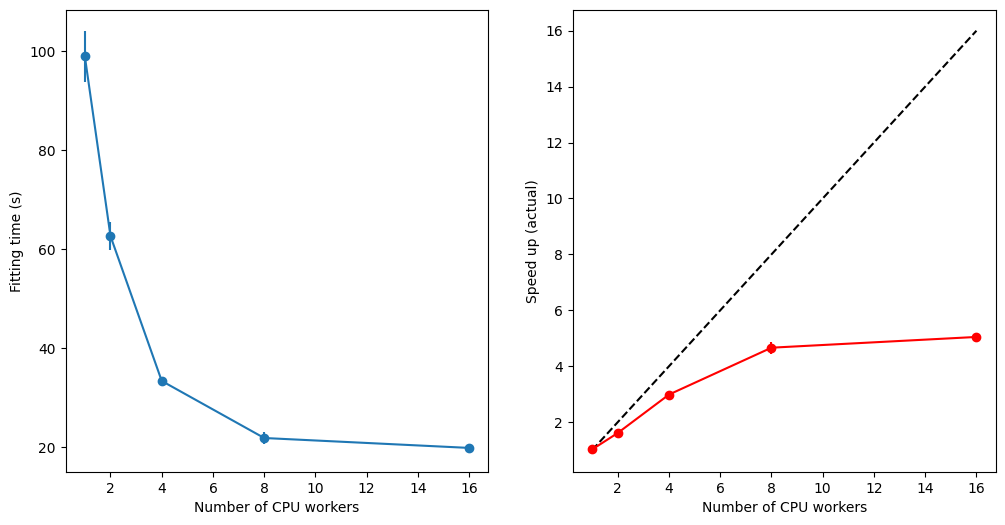

In [31]:
# Plot fitting times
time_mean = np.mean(times, axis=1)
time_sem = np.std(times, axis=1) / np.sqrt(runs)

_, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].errorbar(num_cpu_to_test, time_mean, yerr=time_sem, fmt='o-')
axes[0].set(xlabel='Number of CPU workers', ylabel='Fitting time (s)')

# Speedup / num_cpu
parallel_efficiency = (time_mean[0] / times)
eff_mean = np.mean(parallel_efficiency, axis=1)
eff_sem = np.std(parallel_efficiency, axis=1) / np.sqrt(runs)
axes[1].errorbar(num_cpu_to_test, eff_mean, eff_sem, fmt='ro-')
axes[1].plot([1, num_cpu_to_test[-1]], [1, num_cpu_to_test[-1]], 'k--')
axes[1].set(xlabel='Number of CPU workers', ylabel='Speed up (actual)')

Plot fitted latent variables

Fitting time, DE_workers = 16: 17.462392568588257 s


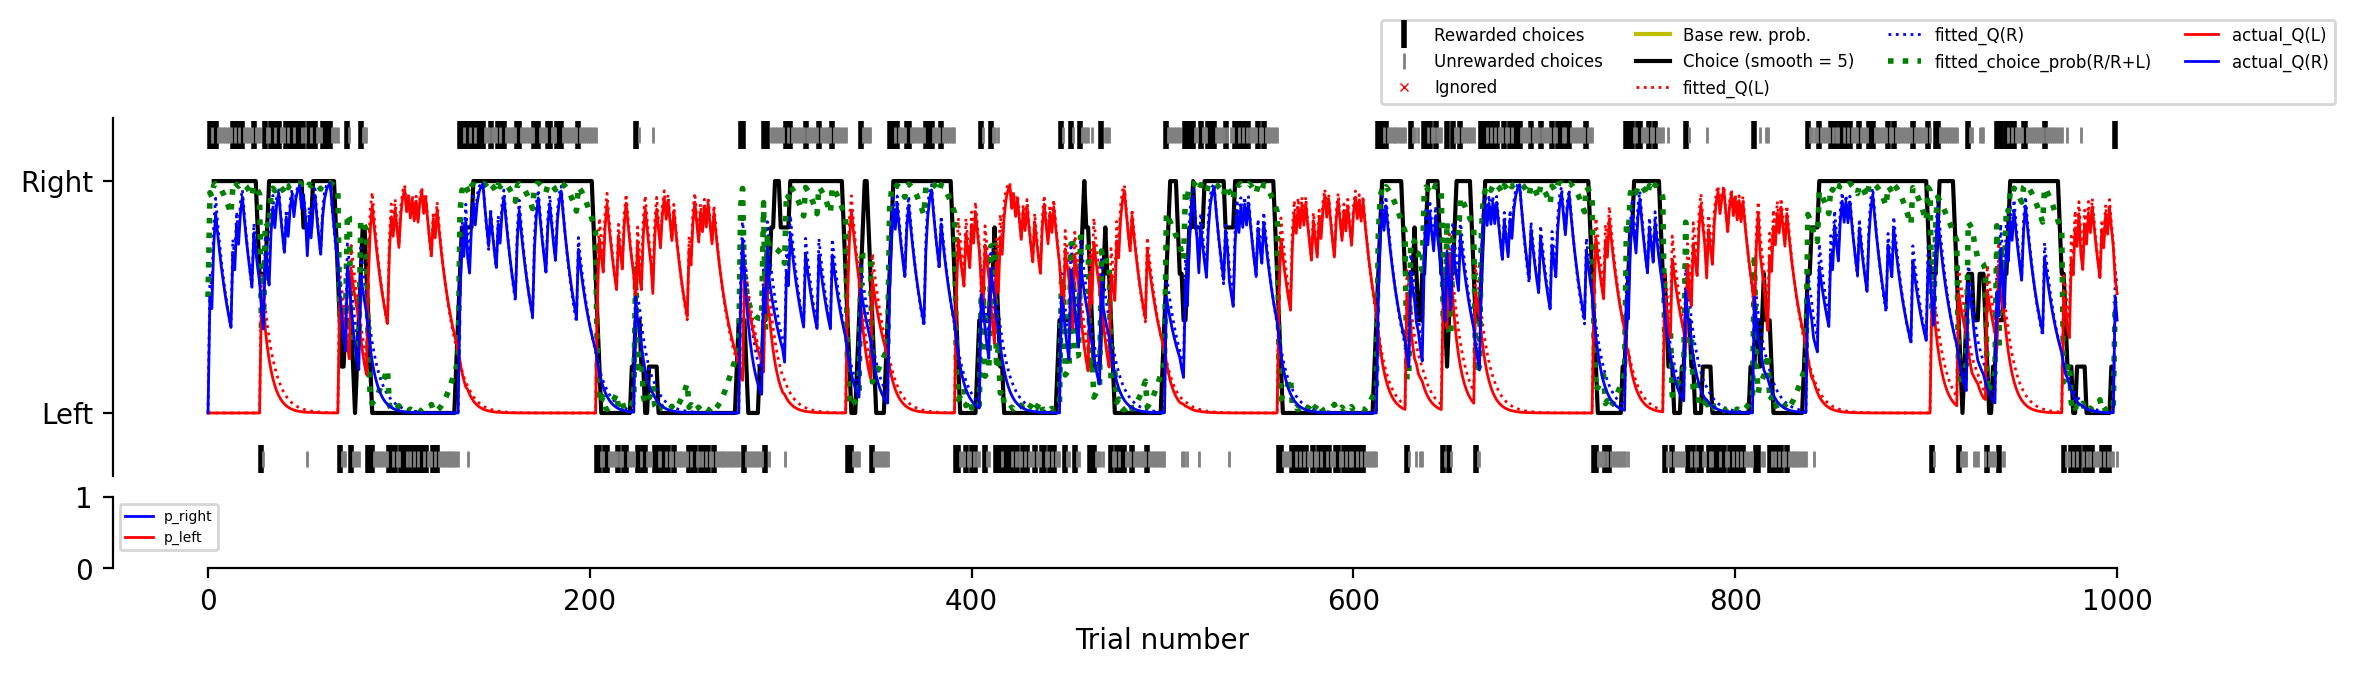

In [8]:
_, forager = time_fitting(16)

fig_fitting, axes = forager.plot_fitted_session()
axes[0].plot(ground_truth_q_estimation[0], lw=1, color="red", ls="-", label="actual_Q(L)")
axes[0].plot(ground_truth_q_estimation[1], lw=1, color="blue", ls="-", label="actual_Q(R)")
axes[0].legend(fontsize=6, loc="upper left", bbox_to_anchor=(0.6, 1.3), ncol=4)